In [3]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from keras.datasets import mnist

(Xtr, ytr), (Xts, yts) = mnist.load_data()

In [5]:
Xtr_flat = Xtr.reshape(Xtr.shape[0],-1)
Xts_flat = Xts.reshape(Xts.shape[0],-1)

#i was having exploding gradient, so i normalized in this way
Xts_flat = Xts_flat / 255
Xtr_flat = Xtr_flat / 255

Xtr_flat.shape

(60000, 784)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

hidden_size = 100

autoencoder = Sequential(
                [
                    Dense(Xtr_flat.shape[1],activation="tanh"),
                    Dense(hidden_size,activation="tanh"),
                    Dense(Xtr_flat.shape[1],activation="tanh")
                ]
)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(Xtr_flat,Xtr_flat, epochs=20, batch_size=400)

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0591
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0200
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0143
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0118
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0105
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0097
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0092
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0089
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0087
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0085
Epoch 11/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0084
Epoch 12/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0084
Epoch 13/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0083
Epoch 14/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0083
Epoch 15/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

In [7]:
prediction = autoencoder.predict(Xts_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step


In [69]:
encoder_model = Sequential(autoencoder.layers[:-1])

# Ottenere l'output del secondo layer per un dato input
second_layer_output = encoder_model.predict(Xts_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step


In [70]:
second_layer_output.shape

(10000, 100)

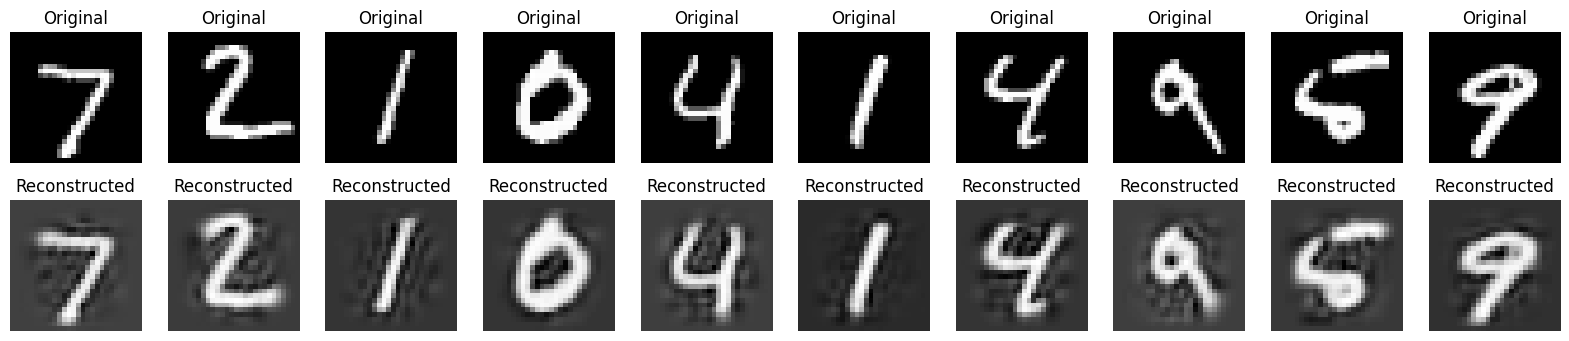

In [8]:
num_images = 10
plt.figure(figsize=(20, 4))

for i in range(num_images):
    # Immagine originale
    plt.subplot(2, num_images, i + 1)
    plt.imshow(Xts_flat[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Immagine ricostruita
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(prediction[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()


In [71]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(second_layer_output)

In [29]:
!pip install seaborn

  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------------------- ------------------- 153.6/294.9 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.2/11.6 MB 4.1 MB/s eta 0:00:03
   - -------------------------------------- 0.4/11.6 MB 4.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/11.6 MB 4.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.6 MB 4.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.6 MB 4.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.6 MB 4.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/11.6 MB 4.6 MB/s eta 0:00:03
   ----- ------------------

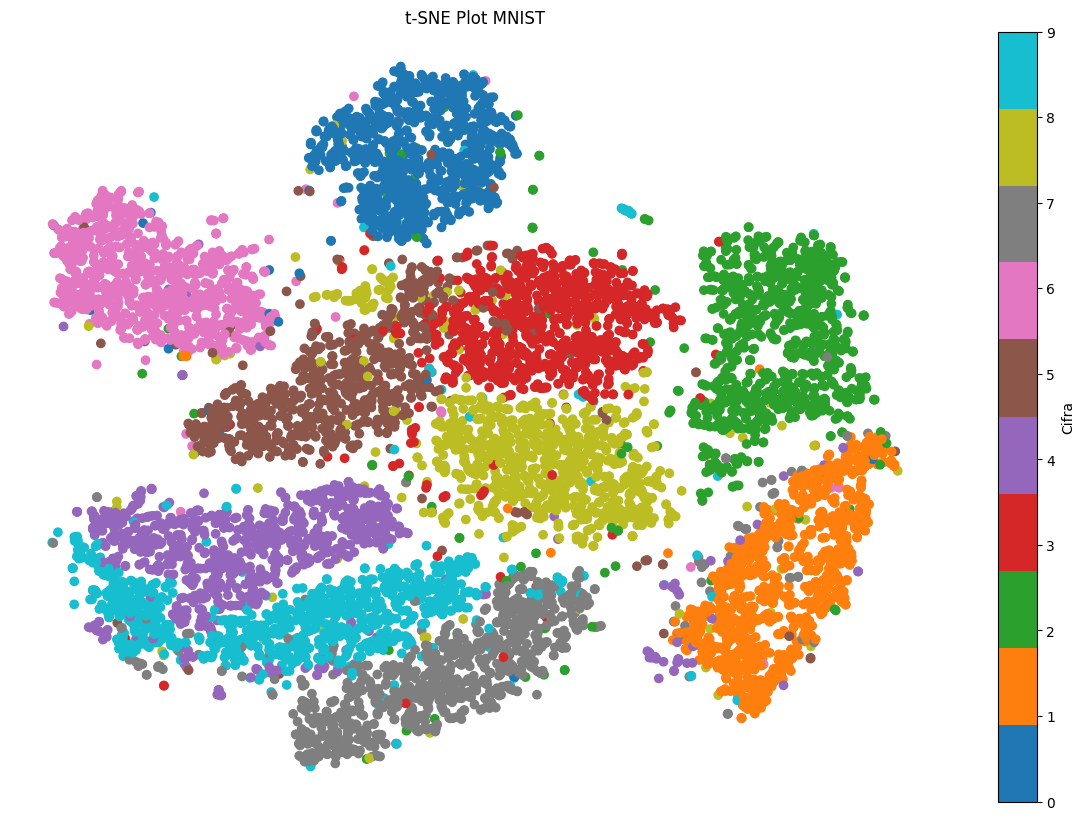

In [72]:
import seaborn as sns
import matplotlib.patches as mpatches

# Estrai le coordinate X e Y dall'embedded_data
x = X_embedded[:, 0]
y = X_embedded[:, 1]

plt.figure(figsize=(15, 10))
sct = plt.scatter(x, y, c=yts, cmap='tab10')

cb = plt.colorbar(label='Cifra', ticks=range(10))

plt.title('t-SNE Plot MNIST')
plt.axis("off")
plt.show()
